<a href="https://colab.research.google.com/github/Vaishu2711/Android_ChatGPT/blob/main/sc_project_taxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install keras
!pip install scikit-learn

In [ ]:
import yfinance as yf
data = yf.download('AAPL', start='2015-01-01', end='2023-01-01')


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0204
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 5.0567e-04
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 3.9748e-04
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.0570e-04
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 3.2463e-04
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 3.2098e-04
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.0630e-04
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 2.8754e-04
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.6120e-04
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 2.8235e-04
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
Mean Squared Error (MSE): 61.94481154273102
Root Mean Squared Error (RMSE): 7.870502623259268
Mean Absolute Error (MAE): 6.404317005035131
R² Score: 0.5962328571745096


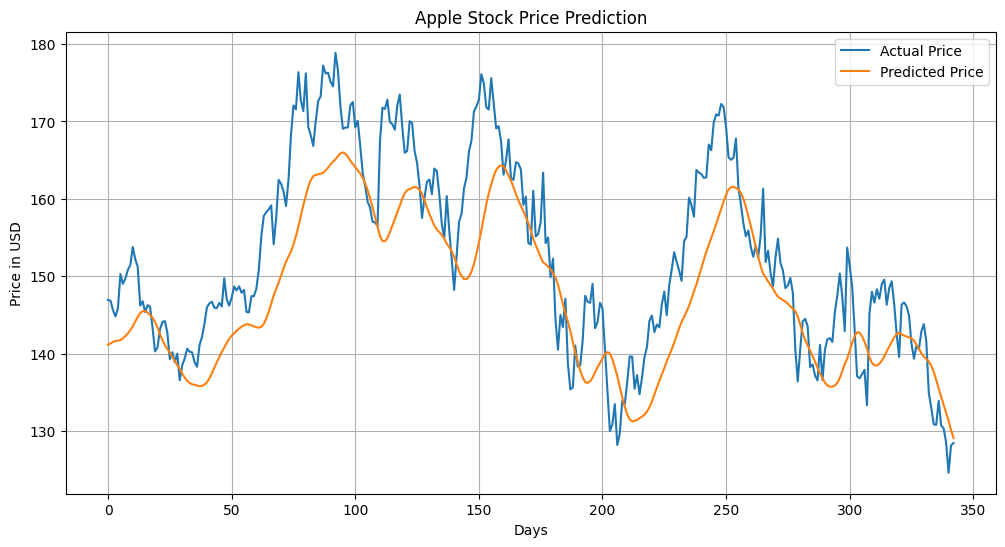

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load stock data
data = yf.download('AAPL', start='2015-01-01', end='2023-01-01')
data = data[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Split data
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Function to create sequences
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

# Reshape to 3D for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Accuracy metrics
mse = mean_squared_error(y_test_actual, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, predicted)
r2 = r2_score(y_test_actual, predicted)

# Print accuracy metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# Visualize
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(predicted, label='Predicted Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(data.head())



Price           Close
Ticker           AAPL
Date                 
2015-01-02  24.320435
2015-01-05  23.635290
2015-01-06  23.637512
2015-01-07  23.968958
2015-01-08  24.889898


TypeError: Image data of dtype object cannot be converted to float

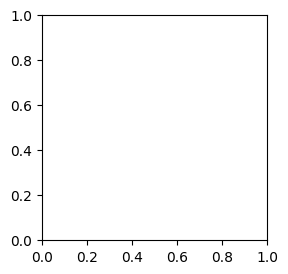

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('image.jpg', 0)
equ = cv2.equalizeHist(img)
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(equ, cmap='gray'), plt.title('Histogram Equalized')
plt.show()
